In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# load data from kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
100% 655M/658M [00:31<00:00, 17.8MB/s]
100% 658M/658M [00:31<00:00, 21.8MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/plantdisease.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:

train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/PlantVillage',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

# Store class_names before applying map
class_names = train_ds.class_names

test_ds = keras.utils.image_dataset_from_directory(
    directory='/content/plantvillage',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

# nornalize to range 0 to 1
def normalize(image, label):
    image = tensorflow.cast(image/255. , tensorflow.float32)
    return image, label

train_ds = train_ds.map(normalize)
test_ds = test_ds.map(normalize)

# ... (rest of your code) ...

# Access class_names using the stored variable
num_classes = len(class_names)

Found 20638 files belonging to 15 classes.
Found 20638 files belonging to 1 classes.


In [ ]:
num_classes

15

In [ ]:
model = Sequential()

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss= "categorical_crossentropy",metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 67s 89ms/step - accuracy: 0.4189 - loss: 1.8040 - val_accuracy: 0.0329 - val_loss: 6.1311
Epoch 2/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 46s 71ms/step - accuracy: 0.7792 - loss: 0.6583 - val_accuracy: 0.0475 - val_loss: 9.8911
Epoch 3/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 90s 83ms/step - accuracy: 0.8684 - loss: 0.3968 - val_accuracy: 0.0487 - val_loss: 10.6373
Epoch 4/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 54s 83ms/step - accuracy: 0.9189 - loss: 0.2444 - val_accuracy: 0.0509 - val_loss: 12.0901
Epoch 5/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 54s 84ms/step - accuracy: 0.9410 - loss: 0.1683 - val_accuracy: 0.0424 - val_loss: 17.9537
Epoch 6/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 54s 83ms/step - accuracy: 0.9553 - loss: 0.1280 - val_accuracy: 0.0470 - val_loss: 19.8333
Epoch 7/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 75s 73ms/step - accuracy: 0.9600 - loss: 0.1178 - val_accuracy: 0.0432 - val_loss: 20.6830
Epoch 8/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 88s 83ms/step - accuracy: 0.9790 - loss: 0.06

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
import cv2

In [ ]:
image_path = '/content/plantvillage/PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG'

In [ ]:
# Function to preprocess an image
def preprocess_image(image_path):
    img = cv2.imread(image_path)  # Load the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (256, 256))  # Resize to 224x224
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

In [ ]:
# Preprocess and predict
processed_image = preprocess_image(image_path)
prediction = model.predict(processed_image)

# Get class label
# Instead of train_data.class_indices, use class_names obtained earlier
class_labels = class_names  # Get class names from training data
predicted_class = class_labels[np.argmax(prediction)]  # Get predicted class

print(f"Predicted Disease: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Disease: Potato___Early_blight


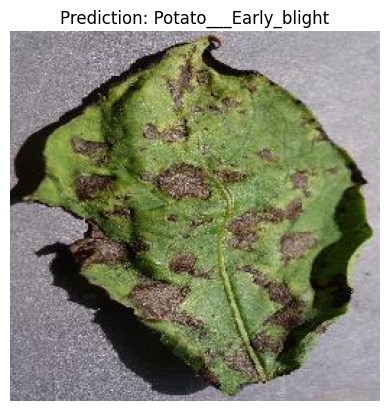

In [ ]:
import matplotlib.pyplot as plt

# Display the image with prediction
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.title(f"Prediction: {predicted_class}")
plt.show()

In [ ]:
import pickle

In [ ]:
# pickle.dump(model,open('plant_model.pkl','wb'))

In [ ]:
# with open('class_names.pkl', 'wb') as f:
#   pickle.dump(class_names, f)